# Exploratory Data Analysis

In [1]:
# import packages
import os
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing 
import seaborn as sns
from tqdm import tqdm
from IPython.display import display

# pandas display options
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 300)
pd.set_option('float_format', '{:.2f}'.format) # All float will be displayed in 2 d.p.

In [2]:
# datasets paths
path = "data"
macro = os.path.join(path, "macro.csv")
train = os.path.join(path, "train.zip")
test = os.path.join(path,  "test.zip")

# place all datasets paths in a datasets dict
datasets = {}
datasets['macro'] = macro
datasets['train'] = train
datasets['test'] = test

# load dataframes into dfs dict
dfs = {}
for dataset_name, path in datasets.items():
    df = pd.read_csv(path)
    dfs[dataset_name] = df

# assign to own df variables when you want to use them individually
df_macro = dfs['macro']
df_train = dfs['train']
df_test = dfs['test']

## Overview of datasets

**Dataset size & Number of distinct datatypes**

In [20]:
for dataset_name, df in dfs.items():
    print("====== Dataset size - {}: {} ======".format(dataset_name , df.shape))
    print("Number of distinct datatypes: \n{}".format(df.dtypes.map(type).value_counts()))

====== Dataset size - macro: (2484, 100) ======
Number of distinct datatypes: 
<class 'numpy.dtype[float64]'>    94
<class 'numpy.dtype[object_]'>     4
<class 'numpy.dtype[int64]'>       2
dtype: int64
====== Dataset size - train: (30471, 292) ======
Number of distinct datatypes: 
<class 'numpy.dtype[int64]'>      157
<class 'numpy.dtype[float64]'>    119
<class 'numpy.dtype[object_]'>     16
dtype: int64
====== Dataset size - test: (7662, 291) ======
Number of distinct datatypes: 
<class 'numpy.dtype[int64]'>      159
<class 'numpy.dtype[float64]'>    116
<class 'numpy.dtype[object_]'>     16
dtype: int64


**Display top 5 rows for dataset**

In [4]:
for dataset_name, df in dfs.items():
    print("Display top 5 rows for dataset: {}".format(dataset_name))
    display(df.head(5))

Display top 5 rows for dataset: macro


,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.20,-0.08,5.00,NaN,NaN,NaN,NaN,NaN,7484970,NaN,NaN,142968,NaN,13.72,8375.86,NaN,30789.20,0.04,38410.50,NaN,11443.63,2882.42,251.48,106.80,6436.24,0.02,0.69,63932.00,732.76,0.72,0.28,0.96,12865.00,233.35,8.00,3.90,553874.90,95.80,-0.30,14.10,13.80,10.70,11.00,216.00,18.72,99.90,99.80,99.60,44.40,95.70,55.00,99.90,0.30,74.20,6.10,5.87,696.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.48,"45,713",1356.11,NaN,NaN,NaN,18.00,99.40,7872.85,162.90,NaN,NaN,NaN,690.00,6221.00,527.00,0.41,993.00,NaN,NaN,63.03,22825.00,NaN
1,2010-01-02,76.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.20,-0.08,5.00,NaN,NaN,NaN,NaN,175.15,7484970,NaN,NaN,142968,NaN,13.72,8375.86,NaN,30789.20,0.04,38410.50,NaN,11443.63,2882.42,251.48,106.80,6436.24,0.02,0.69,63932.00,732.76,0.72,0.28,0.96,12865.00,233.35,8.00,3.90,553874.90,95.80,-0.30,14.10,13.80,10.70,11.00,216.00,18.72,99.90,99.80,99.60,44.40,95.70,55.00,99.90,0.30,74.20,6.10,5.87,696.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.48,"45,713",1356.11,NaN,NaN,NaN,18.00,99.40,7872.85,162.90,NaN,NaN,NaN,690.00,6221.00,527.00,0.41,993.00,NaN,NaN,63.03,22825.00,NaN
2,2010-01-03,76.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.20,-0.08,5.00,NaN,NaN,NaN,NaN,178.66,7484970,NaN,NaN,142968,NaN,13.72,8375.86,NaN,30789.20,0.04,38410.50,NaN,11443.63,2882.42,251.48,106.80,6436.24,0.02,0.69,63932.00,732.76,0.72,0.28,0.96,12865.00,233.35,8.00,3.90,553874.90,95.80,-0.30,14.10,13.80,10.70,11.00,216.00,18.72,99.90,99.80,99.60,44.40,95.70,55.00,99.90,0.30,74.20,6.10,5.87,696.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.48,"45,713",1356.11,NaN,NaN,NaN,18.00,99.40,7872.85,162.90,NaN,NaN,NaN,690.00,6221.00,527.00,0.41,993.00,NaN,NaN,63.03,22825.00,NaN
3,2010-01-04,76.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.91,43.41,80.12,NaN,38807.20,-0.08,5.00,NaN,NaN,NaN,NaN,183.44,7484970,NaN,NaN,142968,NaN,13.72,8375.86,NaN,30789.20,0.04,38410.50,NaN,11443.63,2882.42,251.48,106.80,6436.24,0.02,0.69,63932.00,732.76,0.72,0.28,0.96,12865.00,233.35,8.00,3.90,553874.90,95.80,-0.30,14.10,13.80,10.70,11.00,216.00,18.72,99.90,99.80,99.60,44.40,95.70,55.

Display top 5 rows for dataset: train


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,...,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6407578.10,155572,0.19,0.00,9576,5001.00,5,10309,11065.00,5,0,240.00,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,25631,9576,4899,4677,10309,5463,4846,23603,12286,11317,17508,9425,8083,18654,9709,8945,211.00,25.00,0.00,0.00,0.00,2.00,184.00,...,2,0,0,7,1,11.77,15.97,9,188854,19,1244891,36,614.29,1042.86,828.57,1,15,11,6,2,1,0,1,2,0,0,10,1,11.98,13.55,12,251554,23,1419204,68,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9589336.91,115352,0.37,0.05,6880,3119.00,5,7759,6237.00,8,0,229.00,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,no,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,9266,20165,6880,3466,3414,7759,3909,3850,17700,8998,8702,15164,7571,7593,13729,6929,6800,245.00,83.00,1.00,0.00,67.00,4.00,90.00,...,5,0,4,9,0,22.37,19.25,4,165510,8,179065,21,695.24,1190.48,942.86,0,7,8,3,2,1,0,1,5,0,4,11,0,18.07,27.32,12,821986,14,491565,30,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,60

Display top 5 rows for dataset: test


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,...,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.00,20.70,2,9,1,1998.00,1,8.90,3.00,Investment,Juzhnoe Butovo,26155137.04,178264,0.14,0.04,14080,11926.00,11,14892,24750.00,13,1,NaN,1,0,13,4,no,0,4,4,no,no,no,no,no,no,no,no,102618,47681,54937,30808,16251,14557,121369,59138,62231,26087,7410,18677,14080,7457,6623,14892,7839,7053,34341,18094,16247,19906,9676,10230,27123,14340,12783,1681.00,173.00,607.00,19.00,245.00,116.00,431.00,...,1,2,0,0,4,0,15.17,1.18,0,0,0,0,3,1000.00,1500.00,1250.00,0,0,0,3,0,0,0,1,2,1,0,5,0,14.69,2.87,0,0,3,73000,12,781.82,1227.27,1004.55,1,2,2,7,0,0,0,1,3,1,0,7,0,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.20,NaN,8,17,1,0.00,3,1.00,1.00,OwnerOccupier,Poselenie Vnukovskoe,25536296.81,4001,0.50,0.01,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,no,17790,8350,9443,574,297,277,2566,1356,1211,861,244,617,275,143,133,264,136,128,646,336,311,3796,2035,1762,506,261,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,1,0,49.26,4.06,0,0,1,5000,7,757.14,1285.71,1021.43,0,1,3,2,1,0,0,1,2,0,0,1,0,39.50,3.32,0,0,2,22000,10,680.00,1200.00,940.00,0,1,6,2,1,0,0,1,5,0,0,7,0,39.10,7.70,2,177300,6,231300,20,733.33,1250.00,991.67,2,4,8,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.50,25.10,3,5,2,1960.00,2,4.80,2.00,Investment,Perovo,9946335.11,13932

**Display descriptive statistics for dataset**

In [5]:
for dataset_name, df in dfs.items():
    print("Display descriptive statistics for dataset: {}".format(dataset_name))
    display(df.describe())

Display descriptive statistics for dataset: macro


,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,load_of_teachers_school_per_teacher,students_state_oneshift,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
count,2484.00,2394.00,2394.00,2453.00,2453.00,2119.00,2453.00,2394.00,2481.00,2481.00,2481.00,2088.00,2484.00,2484.00,2484.00,2119.00,2474.00,2474.00,2474.00,2483.00,2484.00,2453.00,2070.00,2484.00,2119.00,2484.00,1826.00,1461.00,2191.00,1826.00,2191.00,1826.00,2484.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,1826.00,1826.00,1826.00,1826.00,1826.00,1826.00,1826.00,1826.00,1826.00,2191.00,1826.00,1826.00,2191.00,2191.00,1826.00,1826.00,1826.00,1826.00,1826.00,1826.00,1826.00,1826.00,1826.00,1826.00,2191.00,1826.00,1826.00,1826.00,2211.00,2211.00,2211.00,2211.00,2211.00,2211.00,2211.00,1461.00,2191.00,1826.00,1826.00,2191.00,2191.00,1826.00,1461.00,1461.00,731.00,730.00,2191.00,1461.00,2191.00,1461.00,1826.00,1461.00,1461.00,1826.00,1826.00
mean,86.47,16993.23,1.52,407.81,480.22,110.12,15.34,16.85,40.73,50.44,88.18,-0.04,62557.07,0.01,5.77,6.56,1314.54,1553.80,129.03,233.73,15041696.69,0.01,6.30,500798.07,0.43,12.66,10722.96,0.11,51766.24,-0.00,52188.93,0.11,15331.50,3767.97,315.64,100.63,6818.98,0.01,0.72,102647.82,1229.29,0.69,0.31,0.95,51196.61,200.78,8.12,3.76,624322.88,108.55,1.19,8.56,9.66,11.16,9.96,226.40,19.04,99.24,99.08,98.64,43.86,94.88,54.82,99.54,0.36,75.93,6.82,7.61,691.36,166.75,95.23,72.05,52.87,47.30,38.90,31.00,808.76,1455.17,94.34,55.25,96.17,7983.72,171.59,790.28,294.75,767.54,480.50,8691.92,580.52,0.44,1245.54,349902.58,25.07,67.80,36282.43,230615.06
std,27.53,3187.07,2.88,65.90,70.29,14.82,3.88,16.99,15.01,13.91,26.96,0.27,14503.68,0.04,0.54,0.45,334.60,180.79,7.10,35.58,4762312.34,0.02,1.90,394604.98,0.48,0.66,1526.66,0.05,13310.71,0.05,9068.56,0.04,2789.14,548.17,38.93,8.21,229.13,0.00,0.02,25659.13,332.48,0.02,0.02,0.03,22888.86,54.52,0.25,0.10,71437.48,12.99,0.70,3.20,2.69,0.30,0.48,7.76,0.24,0.54,0.59,0.74,0.38,0.67,0.45,0.29,0.05,0.87,0.86,1.76,17.55,27.12,11.51,8.47,5.67,3.07,5.04,3.98,57.33,73.17,5.91,18.71,3.30,591.70,110.80,55.84,5.97,26.52,209.64,1668.97,37.99,0.02,162.53,72146.45,2.45,5.17,10761.67,2944.88
min,29.11,9995.80,-4.50,315.10,337.20,86.72,5.82,-4.10,27.28,37.45,27.88,-0.52,38807.20,-0.08,4.00,5.96,628.41,1197.39,97.86,171.15,7484970.00,-0.02,4.00,8016.00,-0.41,11.40,8375.86,0.07,29880.20,-

Display descriptive statistics for dataset: train


,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,...,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.00,30471.00,24088.00,30304.00,20899.00,20899.00,16866.00,20899.00,20899.00,16912.00,30471.00,30471.00,30471.00,30471.00,30471.00,23783.00,30471.00,30471.00,23786.00,30471.00,30471.00,16030.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,25480.00,25480.00,25480.00,25480.00,25480.00,25480.00,25480.00,25480.00,25480.00,25480.00,25480.00,25480.00,25480.00,25480.00,25480.00,25480.00,30471.00,30471.00,30471.00,...,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,28746.00,28746.00,28746.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,29480.00,29480.00,29480.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30293.00,30471.00,30471.00,30471.00,30471.00,30471.00,30174.00,30174.00,30174.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,30471.00,3

Display descriptive statistics for dataset: test


,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,...,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
count,7662.00,7662.00,6486.00,7662.00,7662.00,7662.00,6613.00,7662.00,7662.00,6968.00,7662.00,7662.00,7662.00,7662.00,7662.00,6066.00,7662.00,7662.00,6067.00,7662.00,7662.00,4244.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,6444.00,6444.00,6444.00,6444.00,6444.00,6444.00,6444.00,6444.00,6444.00,6444.00,6444.00,6444.00,6444.00,6444.00,6444.00,6444.00,7662.00,7662.00,7662.00,...,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7643.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7238.00,7238.00,7238.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7480.00,7480.00,7480.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7570.00,7662.00,7662.00,7662.00,7662.00,7662.00,7534.00,7534.00,7534.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00,7662.00
mean,34304.50,53.70,32.66,7.65,12.59,1.85,1820.89,1.88,6.94,1.99,17685763.60,87522.52

## Check for Missing Values

In [17]:
# calculate the raw number of cols w/ missing values
missing_values_raw = df_train.isna().sum()

# calculate the percentage of cols w/ missing values (round to 2 d.p.)
missing_values_percentage = round(((df_train.isna().sum()) / df_train.shape[0]) * 100, 2)

# concat both series, rename col names, set index name, sort by descending order
merged_missing_values = pd.concat([missing_values_raw, missing_values_percentage], axis=1)
merged_missing_values.rename(columns={0: "Raw", 1: "Percentage"}, inplace=True)
merged_missing_values.index.name = 'Variables'
merged_missing_values.reset_index(inplace=True)
merged_missing_values.sort_values(by=['Raw'], ascending=False, inplace=True)

# # get number of cols w/ missing values
num_missing_values_col = (merged_missing_values['Raw'] != 0).sum()

# # display only those n cols w/ missing values
print("Number of columns with missing values: {}".format(num_missing_values_col))
df_missing_values = merged_missing_values[merged_missing_values['Raw'].values != 0]
display(df_missing_values)

Number of columns with missing values: 51


,Variables,Raw,Percentage
24,hospital_beds_raion,14441,47.39
7,build_year,13605,44.65
10,state,13559,44.50
162,cafe_avg_price_500,13281,43.59
161,cafe_sum_500_max_price_avg,13281,43.59
160,cafe_sum_500_min_price_avg,13281,43.59
5,max_floor,9572,31.41
6,material,9572,31.41
8,num_room,9572,31.41
9,kitch_sq,9572,31.41


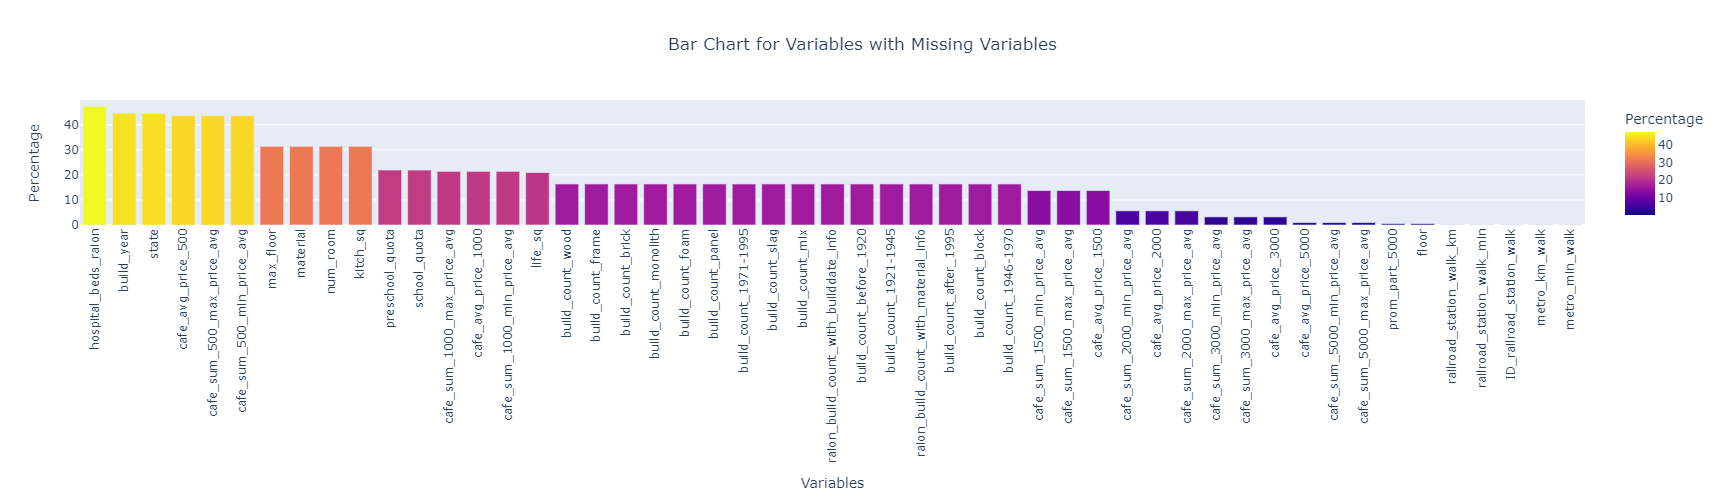

In [37]:
# plot the bar chart of cols w/ missing values
fig = px.bar(df_missing_values, x='Variables', y='Percentage', hover_data=['Raw'], color='Percentage', title='Bar Chart for Variables with Missing Variables', width=1000, height=500)  
fig.update_layout(title_x=0.5) # centralize title
fig.update_xaxes(tickangle=-90) # rotate x label 90 deg so its easier to see
fig.show()

## Univariate Analysis for target variable ```price_doc```

In [22]:
df_train['price_doc'].describe()

count       30471.00
mean      7123035.28
std       4780111.33
min        100000.00
25%       4740002.00
50%       6274411.00
75%       8300000.00
max     111111112.00
Name: price_doc, dtype: float64

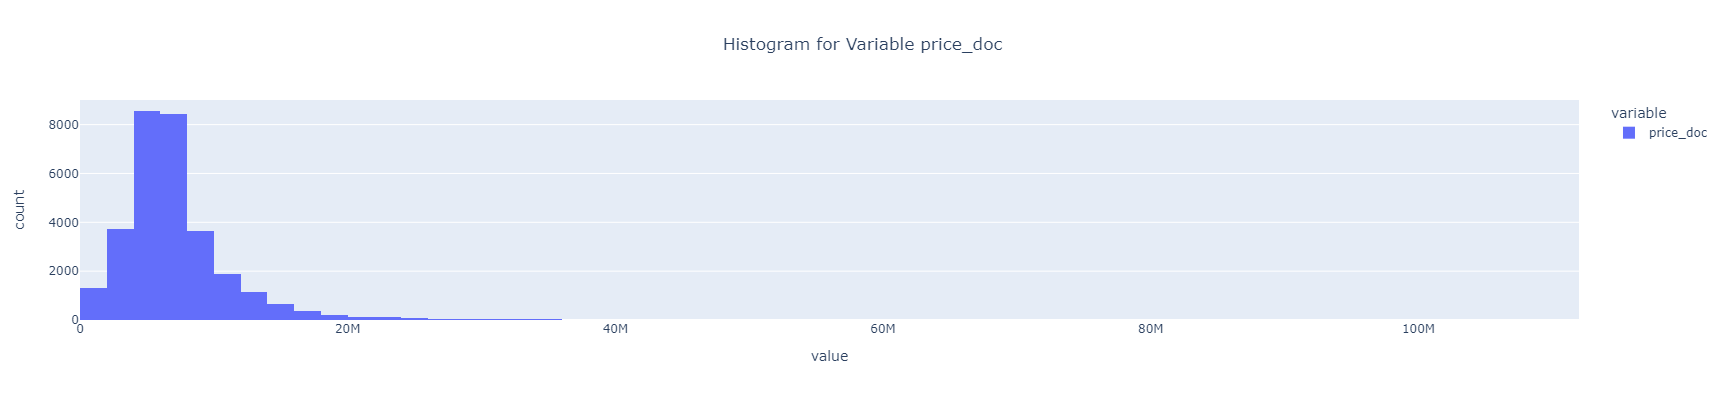

In [49]:
# Histogram for price_doc
fig = px.histogram(df_train['price_doc'], nbins=100, title='Histogram for Variable price_doc', width=600, height=400)
fig.update_layout(title_x=0.5) # centralize title
fig.show()

In [54]:
range(df_train.shape[0])

range(0, 30471)

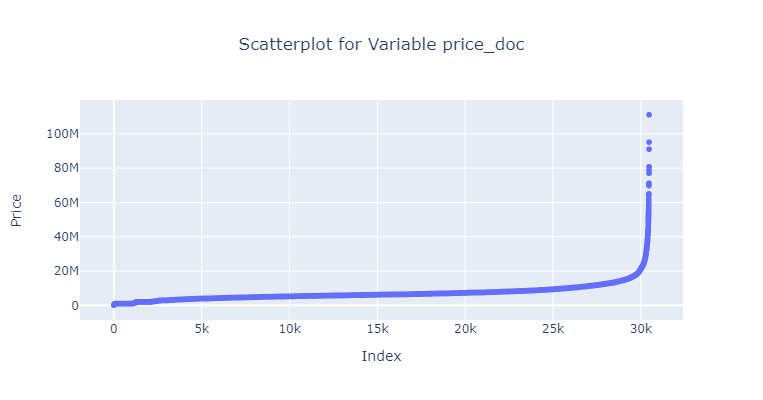

In [63]:
# Scatterplot for price_doc
fig = px.scatter(df, x=list(range(df_train.shape[0])), y=np.sort(df_train['price_doc'].values), title='Scatterplot for Variable price_doc', width=600, height=400)
fig.update_layout(title_x=0.5,
                  xaxis_title="Index",
                  yaxis_title="Price"
                 )
fig.show()

**Check out the top 5 most expensive houses**

In [88]:
# Top 5 most expensive houses - Teplyj Stan sub area has most expensive house
df_train.nlargest(5, 'price_doc')

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,...,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
2118,2121,2012-05-10,55,31.00,12.00,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Teplyj Stan,8392316.21,130396,0.43,0.00,6980,4523.00,5,7614,9443.00,6,0,NaN,1,0,3,2,no,0,5,3,no,no,no,yes,no,yes,no,no,90114,47893,42221,15541,7898,7643,76776,38310,38466,38079,12885,25194,6980,3496,3484,7614,3917,3697,17425,8832,8593,20655,10812,9843,13682,6913,6769,195.00,53.00,0.00,0.00,3.00,8.00,131.00,...,5,0,1,5,0,47.25,0.06,3,90893,2,82800,28,757.69,1250.00,1003.85,2,9,5,7,5,0,0,1,9,0,1,10,0,35.51,4.76,7,145488,11,355700,70,704.55,1189.39,946.97,4,20,21,15,10,0,0,3,15,0,1,25,0,24.68,14.26,29,781653,42,1253571,177,669.70,1133.33,901.52,12,50,57,40,18,0,0,6,28,1,4,48,8,111111112
28326,28329,2015-03-12,220,144.00,3.00,5.00,2.00,1927.00,9.00,17.00,3.00,Investment,Presnenskoe,11638050.15,123280,0.07,0.04,7125,3240.00,7,6856,10602.00,9,0,1940.00,2,1,29,2,yes,3,5,84,no,no,no,yes,no,no,no,no,57999,25611,32388,14906,7789,7117,75357,38841,36516,33017,10594,22423,7125,3725,3400,6856,3580,3276,16727,8746,7981,10184,4834,5350,13121,6880,6241,836.00,99.00,6.00,1.00,664.00,33.00,30.00,...,29,0,39,28,1,6.67,0.19,221,2124466,34,1303792,994,944.23,1551.82,1248.02,58,241,230,221,157,72,15,40,60,0,49,50,2,6.86,1.54,424,4698954,49,1745942,1724,914.88,1504.34,1209.61,111,419,399,406,258,111,20,77,131,1,73,86,6,6.58,8.96,767,12372993,91,3513891,25

In [65]:
# Get descriptive statistics for houses prices for Teplyj Stan
df_train.price_doc[df_train.sub_area == 'Teplyj Stan'].describe()

count         165.00
mean      8563557.53
std       8877604.58
min        990000.00
25%       6200000.00
50%       7800000.00
75%      10000000.00
max     111111112.00
Name: price_doc, dtype: float64

**Conclusion**
- This house with price_doc = 111,111,112 rubles is an outlier. Thus, there is no effect on the selling price. (?)
- Because the average price for houses in this sub area is 8,563,557 rubles.
- This training dataset has some outliers for houses from 80 million rubles onwards.

**Check out the bottom 5 most inexpensive houses**

In [89]:
# Bottom 5 most inexpensive houses - Teplyj Stan sub area has most expensive house
df_train.nsmallest(5, 'price_doc')

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,...,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
20244,20247,2014-06-27,72,37.00,11.00,16.00,1.00,2006.00,2.00,12.00,1.00,Investment,Gol'janovo,14286990.83,157010,0.39,0.19,7751,5041.00,6,8004,11081.00,7,0,125.00,3,0,5,3,no,0,5,3,no,no,no,yes,no,no,no,no,12327,5588,6739,16831,8637,8194,98260,47405,50855,41919,12424,29495,7751,3941,3810,8004,4152,3852,18912,9716,9196,2780,1351,1429,14694,7551,7143,371.00,88.00,0.00,0.00,68.00,8.00,207.00,...,1,0,0,2,0,36.15,4.89,1,2200,1,320000,6,520.00,900.00,710.00,1,2,2,1,0,0,0,2,1,0,0,4,1,31.02,8.10,4,179700,7,441142,20,621.05,1026.32,823.68,1,6,6,7,0,0,0,2,2,0,0,11,2,34.35,8.99,11,300476,15,505676,53,663.27,1122.45,892.86,4,15,18,12,3,1,0,5,8,0,2,30,5,100000
1167,1168,2012-02-11,38,23.00,9.00,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Beskudnikovskoe,3292112.22,73148,0.06,0.09,4449,2757.00,5,4346,7327.00,5,0,165.00,1,0,3,2,no,0,2,2,no,no,no,no,no,no,no,no,41504,18905,22599,9308,4847,4461,44449,22170,22279,19391,5955,13436,4449,2281,2168,4346,2283,2063,10271,5360,4911,9620,4575,5045,8322,4322,4000,222.00,97.00,0.00,0.00,4.00,13.00,108.00,...,2,0,0,6,1,7.38,17.90,4,89500,9,251900,32,958.06,1564.52,1261.29,1,4,9,12,3,3,0,1,3,0,0,8,1,9.27,34.24,15,534307,16,638483,56,890.38,1480.77,1185.58,4,6,20,17,5,4,0,4,6,0,0,20,2,14.00,20.56,40,932458,48,1503065,180,685.98,1155.49,920.73,16,45,61,45,9,4,0,13,23,1,0,66,5,190000
1169,117

## Bivariate Analysis

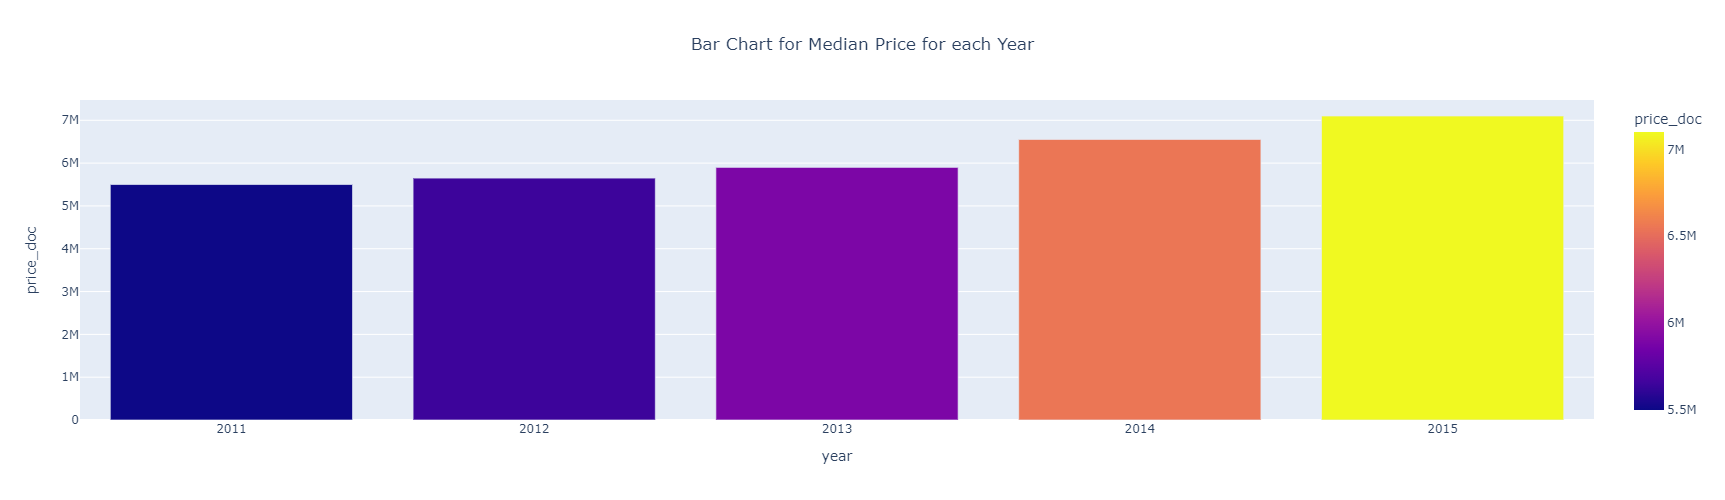

In [112]:
# plot the bar chart of median price for each year
# convert timestamp col to datetime format
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])
df_train['year'] = df_train['timestamp'].map(lambda x: x.year)

median_price = df_train.price_doc.groupby(df_train.year).median().to_frame()
fig = px.bar(median_price, x=median_price.index, y='price_doc', color='price_doc', title='Bar Chart for Median Price for each Year', width=1000, height=500)  
fig.update_layout(title_x=0.5) # centralize title
fig.show()

**Conclusion:**
- There is a gradual increasing trend with housing prices over the years.